In [52]:
#Importing Required Packages
import numpy as np
import pandas as pd
import quandl
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

#Setting up the Graph's features
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [53]:
# Set start and end date for stock prices
start_date = datetime.date(2009, 3,8)
end_date = datetime.date.today()
# Load data from Quandl
data = quandl.get('FSE/SAP_X', start_date=start_date, end_date=end_date)

In [54]:
# Save data to CSV file
data.to_csv('sap_stock.csv')

In [55]:
data.head()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,None,None,NaN
2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,None,None,NaN
2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,None,None,NaN
2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,None,None,NaN
2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,None,None,NaN


In [56]:
# Check data types in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2784 entries, 2009-03-09 to 2020-02-13
Data columns (total 10 columns):
Open                     2444 non-null float64
High                     2777 non-null float64
Low                      2777 non-null float64
Close                    2784 non-null float64
Change                   11 non-null float64
Traded Volume            2738 non-null float64
Turnover                 2731 non-null float64
Last Price of the Day    0 non-null object
Daily Traded Units       0 non-null object
Daily Turnover           7 non-null float64
dtypes: float64(8), object(2)
memory usage: 239.2+ KB


In [57]:
# Get descriptive statistics summary of data set 
data.describe()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Daily Turnover
count,2444.000000,2777.000000,2777.000000,2784.000000,11.000000,2.738000e+03,2.731000e+03,7.0
mean,61.588470,66.052467,64.950338,65.450921,-0.070000,3.212094e+06,1.896085e+08,0.0
std,24.039977,25.207230,24.871638,25.088210,0.709761,1.962815e+06,9.888759e+07,0.0
min,25.160000,25.820000,24.480000,25.590000,-0.740000,0.000000e+00,1.767350e+05,0.0
25%,42.485000,44.370000,43.540000,43.807500,-0.500000,2.068927e+06,1.323426e+08,0.0
50%,57.580000,60.120000,59.120000,59.675000,-0.290000,2.728638e+06,1.692328e+08,0.0
75%,72.552500,87.980000,86.800000,87.372500,0.085000,3.774548e+06,2.198992e+08,0.0
max,126.760000,127.100000,125.840000,126.900000,1.250000,3.645671e+07,1.369431e+09,0.0


In [58]:
# Display features in data set
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover',
       'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'],
      dtype='object')

In [59]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Close'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [60]:
df.head()

,Date,Close
0,2009-03-09,25.59
1,2009-03-10,26.87
2,2009-03-11,26.64
3,2009-03-12,26.18
4,2009-03-13,25.73


In [61]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2784 entries, 0 to 2783
Data columns (total 2 columns):
Date     2784 non-null datetime64[ns]
Close    2784 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.6 KB


In [62]:
# Check for missing values in the columns
df.isna().values.any()

False

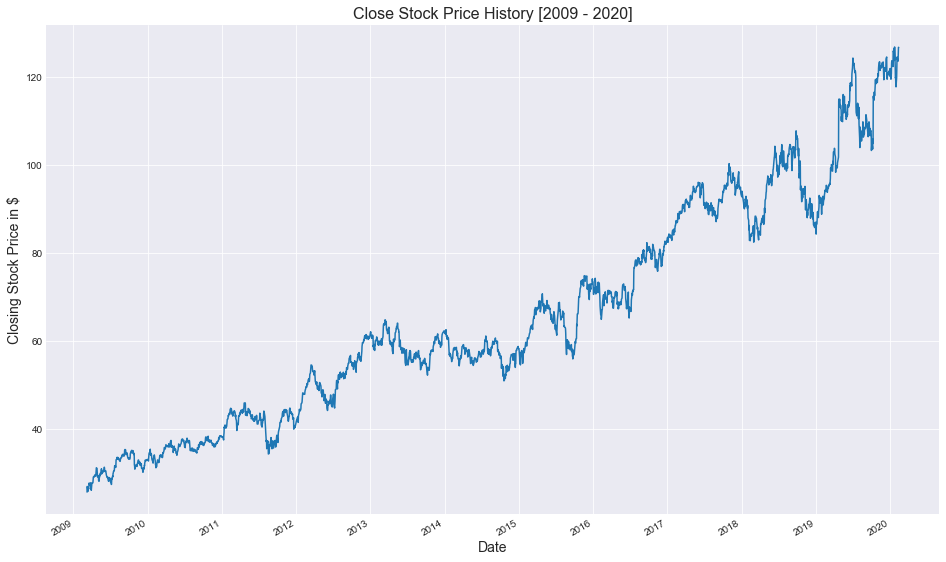

In [65]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

# Creating the Training and Test Split

In [66]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [67]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

# Create and Train the Model

In [68]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [69]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [70]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Model Evaluation

In [71]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)
# The slope coefficient tells us that with a 1 unit increase in date the closing price increases by 0.0276 $
#The intercept coefficient is the price at wich the closing price measurement started, the stock price value at date zero

Slope:  0.03008779979147338
Intercept:  23.615515964386795


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


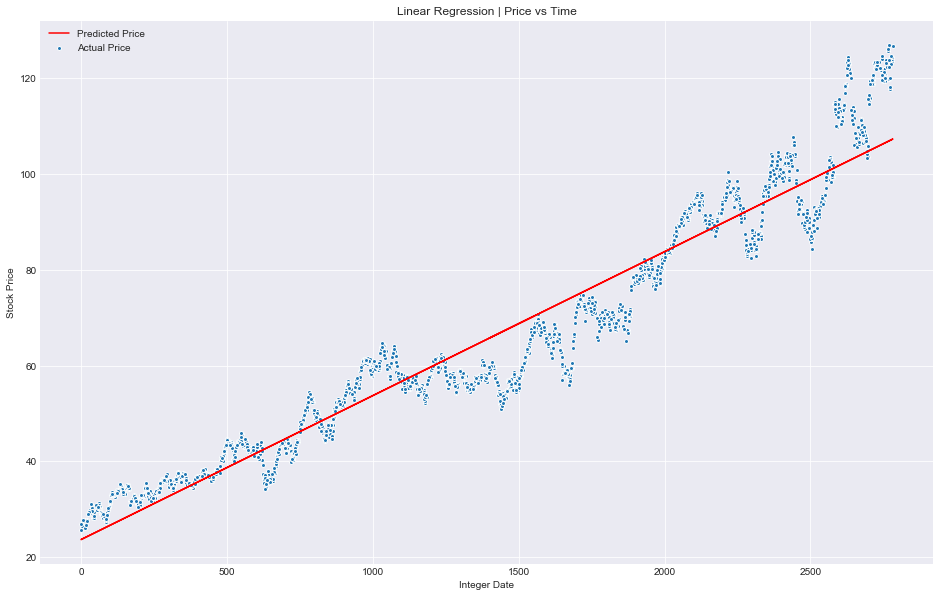

In [72]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Prediction from our Model

In [73]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [74]:
# Generate array with predicted values
y_pred = model.predict(X_test)

# Regression Evaluation

In [75]:
# Get number of rows in data set for random sample
df.shape

(2784, 2)

In [76]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

# Generate 25 random numbers
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [77]:
df_sample.head()

,Date,Close,Prediction
177,2009-11-11,32.01,28.941057
278,2010-04-01,36.37,31.979924
382,2010-08-27,34.79,35.109055
422,2010-10-22,38.04,36.312567
511,2011-02-28,43.72,38.990382


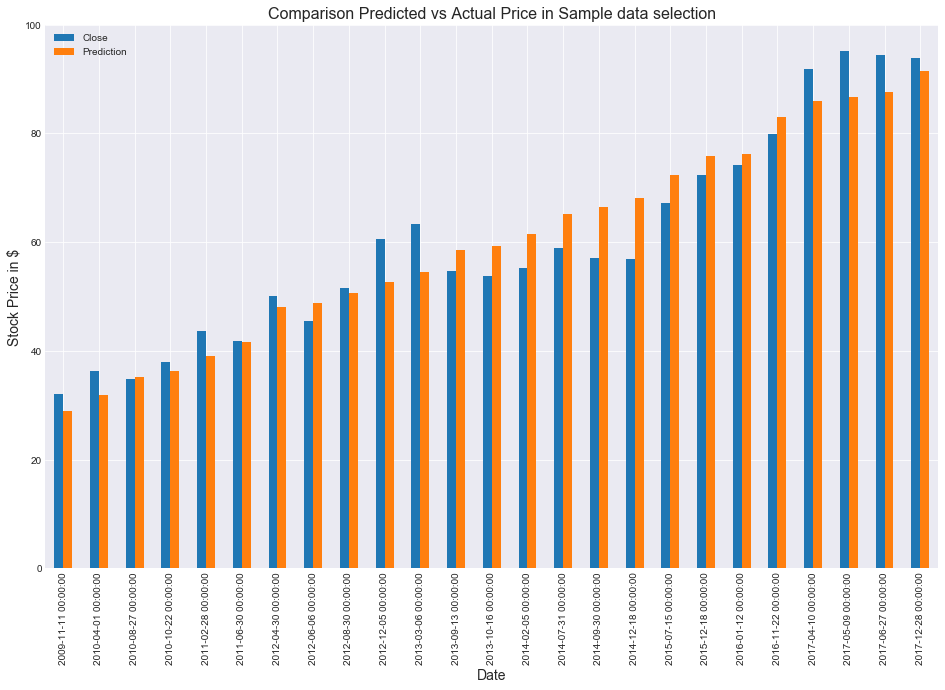

In [78]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)


# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

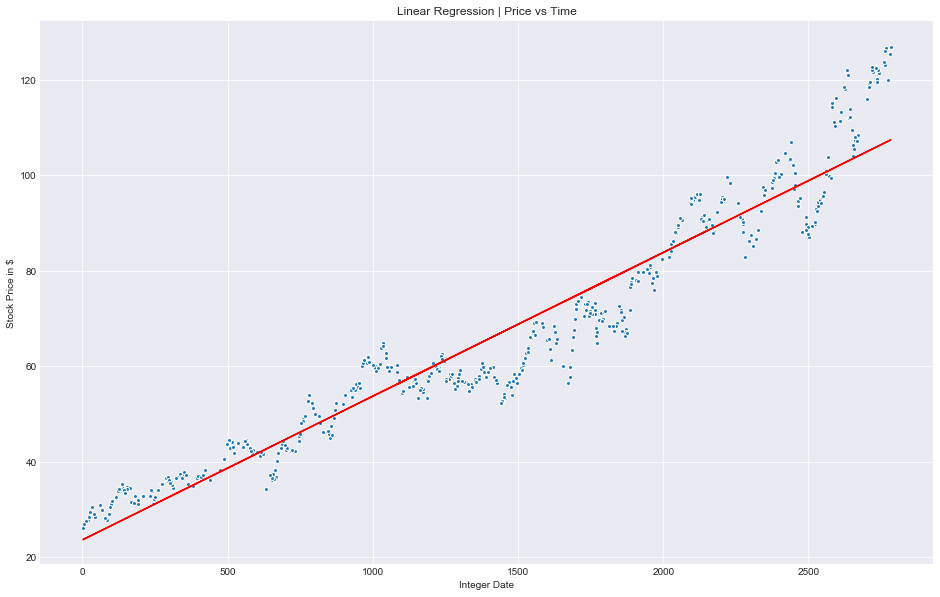

In [79]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

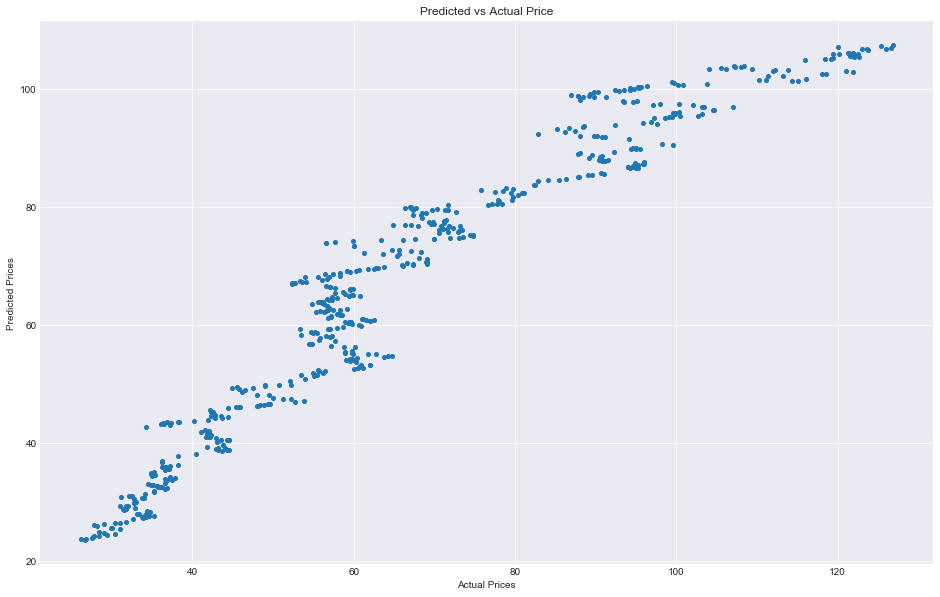

In [80]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


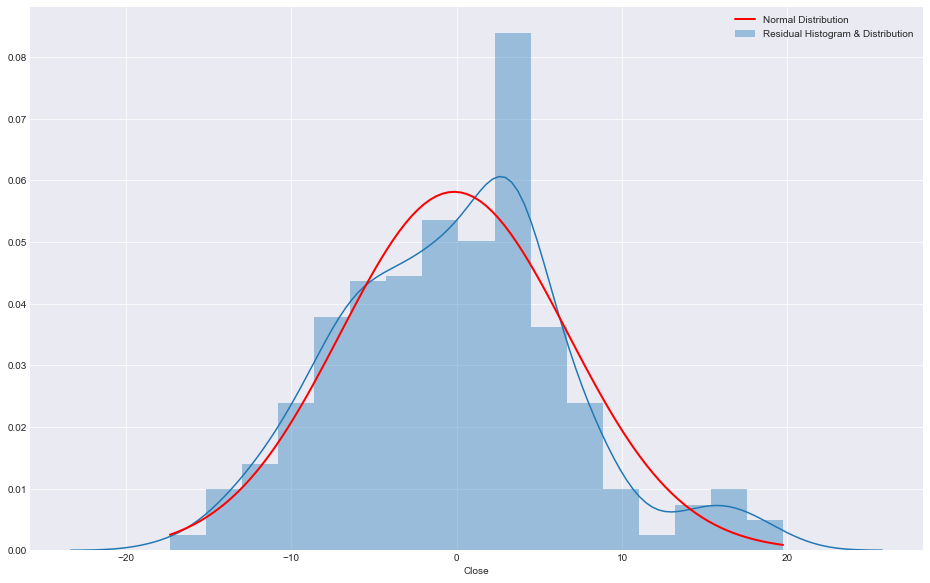

In [81]:
#Residual Histogram

# Import norm package to plot normal distribution
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()


In [82]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [83]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.461119788851696
Mean Squared Error: 47.09849889980767
Root Mean Squared Error: 6.8628346111361065


In [84]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9265955853786789


In [85]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9266348791734884